In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.integrate import solve_ivp

import SIR_utils as sir

In [2]:
dataframe = pd.read_csv("new-jersey-history.csv")
keys_to_use = ["date", "positiveCasesViral"]

df = dataframe[keys_to_use].dropna(axis="rows")[::-1]
print(df)

           date  positiveCasesViral
367  2020-03-05                 2.0
366  2020-03-06                 4.0
365  2020-03-07                 4.0
364  2020-03-08                 6.0
363  2020-03-09                15.0
..          ...                 ...
4    2021-03-03            710046.0
3    2021-03-04            712585.0
2    2021-03-05            715889.0
1    2021-03-06            718873.0
0    2021-03-07            720939.0

[368 rows x 2 columns]


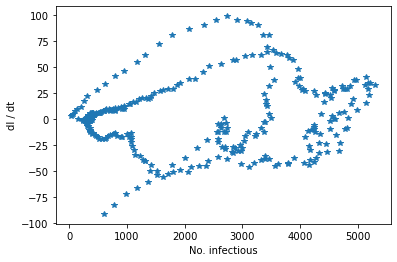

In [3]:
avg_window = 14
infectious, didt = sir.compute_number_infectious(np.array(df[keys_to_use[1]]), avg_window)

key_inf = "infectious"
key_inf_roc = "infectiousROC"
df[key_inf] = infectious
df[key_inf_roc] = didt
keys_to_use.append(key_inf)
keys_to_use.append(key_inf_roc)

plt.plot(infectious, didt, "*")
plt.xlabel("No. infectious")
plt.ylabel("dI / dt")
plt.show()

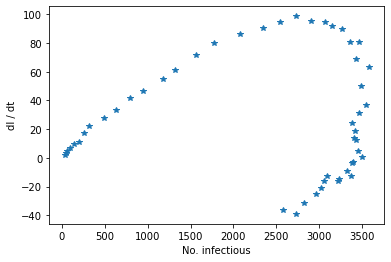

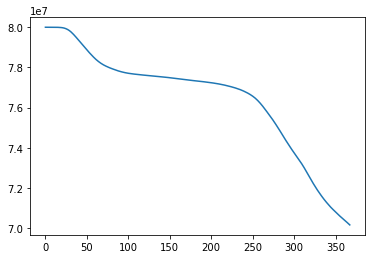

In [4]:
start = 0
stop = 50
plt.plot(infectious[start:stop], didt[start:stop], "*")
plt.xlabel("No. infectious")
plt.ylabel("dI / dt")
plt.show()

pop = 8e7
rem = np.convolve(np.ones(14), np.array(df[keys_to_use[1]]))[:len(infectious)]
sus = pop - rem - infectious
times = np.arange(len(sus))

plt.plot(sus)

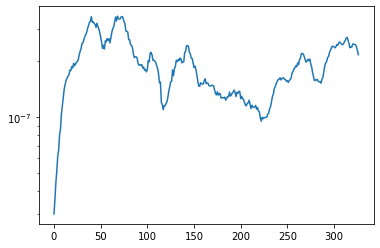

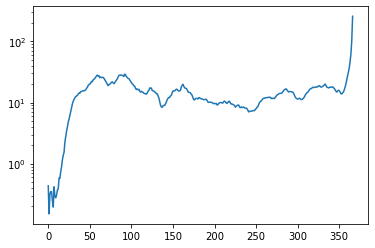

In [12]:
sus_der = sus[1:] - sus[:-1]
alpha = -sus_der / (sus[:-1] * infectious[:-1])
plt.semilogy(alpha[20:-20])
plt.show()
plt.semilogy(-(sus_der + didt[1:]) / infectious[1:])
plt.show()

In [7]:
start = 0
stop = 10
res = sir.compute_sir_coefs(times[start:stop], sus[start:stop], 
                                infectious[start:stop], rem[start:stop], 
                                a_guess=0.1, b_guess=0.1)

a, b = res.x

ode_soln = solve_ivp(sir.sir_ode, [times[start], times[stop]], 
                    [sus[start], infectious[start], rem[start]], 
                    args=(a, b))

plt.plot(infectious[start:stop], didt[start:stop], "*")
plt.plot(ode_soln.y[1, :], a * ode_soln.y[0, :] * ode_soln.y[1, :] - b * ode_soln[1, :])
plt.xlabel("No. infectious")
plt.ylabel("dI / dt")
plt.show()

KeyboardInterrupt: 